In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('./data/titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 데이터 분석1

- 성별 승객수 분석
- 객실 등급별 승객수 분석

In [4]:
type(df['Sex'])

pandas.core.series.Series

In [5]:
from functools import *

In [6]:
# 값의 수를 계산하는 dict 만들기
def count_columns(result_dic, element):
    # dict.get(key): 키로 값 가져오기
    if result_dic.get(element):
        result_dic[element] +=1
    else:
        result_dic[element] =1
        
    return result_dic

def get_group_count(df_column):
    # reduce( 로직, 입력리스트, 결과값)
    return reduce(count_columns, df_column, dict())

In [7]:
# 성별로 수 세는 dict
result = get_group_count(df['Sex'])
result

{'male': 577, 'female': 314}

In [8]:
# pclass로 수세기
result = get_group_count(df['Pclass'])
result

{3: 491, 1: 216, 2: 184}

In [9]:
len(df['Sex'][df.Sex=='female'])

314

In [10]:
len(df['Pclass'][df.Pclass ==1])

216

- 남자/여자 & 객실 등급별 승객 수 분석 결과

In [11]:
len(df)

891

In [12]:
idx = 0
df_columns =[]

# df의 sex, Pclass 컬럼의 값 
element = df['Sex'][idx], df['Pclass'][idx]

df_columns.append(element)
df_columns

[('male', 3)]

In [13]:
# (sex, Pclss) 튜블을 원소로 같은 리스트 만들기

df_columns = []

for idx in range(len(df)):
    element = df['Sex'][idx], df['Pclass'][idx]
    df_columns.append(element)
    
len(df_columns)

891

In [14]:
df_columns[:10]

[('male', 3),
 ('female', 1),
 ('female', 3),
 ('female', 1),
 ('male', 3),
 ('male', 3),
 ('male', 1),
 ('male', 3),
 ('female', 3),
 ('female', 2)]

In [15]:
def get_group_count(df_columns) :
    
    print('len(df_columns) :', len(df_columns))
    
    # 성별로 먼저 들어가고, Pclass로 들어가기
    def count_columns(result_dic, element_tuple) :
        element1, element2 = element_tuple  # element1: Sex, element2: Pclass
        
        # 성별이 key로 없으면 만들기 
        if not (result_dic.get(element1)) :
            result_dic[element1] = {}
            
        # Pclass가 key로 없으면 만글거나, 추가      
        if result_dic[element1].get(element2) :
            result_dic[element1][element2] += 1
        else :
            result_dic[element1][element2] = 1

        return result_dic
    
    result = reduce(count_columns, df_columns, dict())
    return result 

In [16]:
result = get_group_count(df_columns)
result

len(df_columns) : 891


{'male': {3: 347, 1: 122, 2: 108}, 'female': {1: 94, 3: 144, 2: 76}}

In [17]:
dict_element = result['female']
dict_element

{1: 94, 3: 144, 2: 76}

In [18]:
# key로 접근해서 값만 가져오기
dict_values = [dict_element[key] for key in dict_element.keys()]
dict_values

[94, 144, 76]

In [19]:
sum(dict_values)

314

In [20]:
count_f = []
count_m = []

for i in range(3):
    idx = i +1
    count_f.append(result['female'][idx])
    count_m.append(result['male'][idx])
    


In [21]:
count_f, count_m

([94, 76, 144], [122, 108, 347])

## 데이터 분석결과 시각화


In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

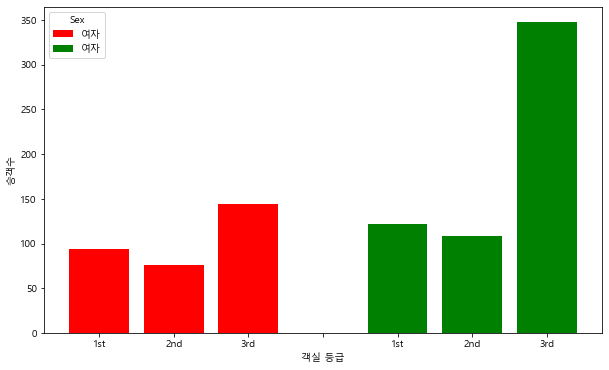

In [24]:
t1 = [1,2,3]
t2 = [5,6,7]

plt.bar(t1, count_f, color= 'r', label = '여자')
plt.bar(t2, count_m, color= 'g', label = '여자')
plt.xlabel('객실 등급')
plt.ylabel('승객수')
plt.legend(title = 'Sex')

t = list(range(1, 8))
plt.xticks(t, ('1st','2nd','3rd','','1st','2nd','3rd'))
plt.show()

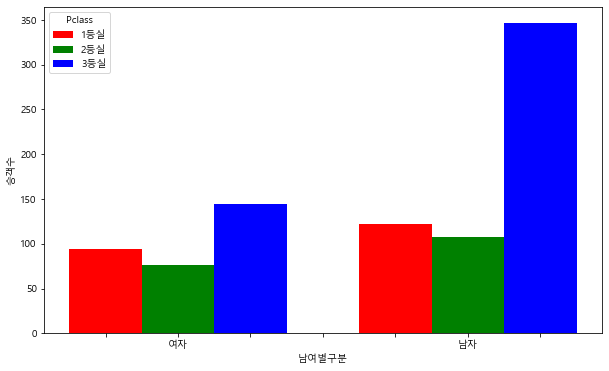

In [27]:
t1 = [ 1, 5 ]
t2 = [ 2, 6 ]
t3 = [ 3, 7 ]

plt.figure(figsize=(10,6))
plt.bar(t1, count_p1, color='r', width=1, label='1등실')
plt.bar(t2, count_p2, color='g', width=1, label='2등실')
plt.bar(t3, count_p3, color='b', width=1, label='3등실')

plt.xlabel('남여별구분')
plt.ylabel('승객수')
plt.legend(title='Pclass')

t = list(range(1,8))
# set the locations of the xticks
plt.xticks(t , ('','여자','','','','남자',''))

plt.show()

# 2번째 분석 방법

In [29]:
from pandas import Series, DataFrame

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
# sex, Pclass만 가져오기
df_tmp = DataFrame({'Sex': df.Sex,
                    'Pclass': df.Pclass})

df_tmp.head()

,Sex,Pclass
0,male,3
1,female,1
2,female,3
3,female,1
4,male,3


In [32]:
len(df[df.Sex =='female'][df.Pclass == 1])

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


94

In [37]:
# 여성만 가져오기
df_tmp_f = df_tmp[df_tmp.Sex == 'female']
df_tmp_f.head()

,Sex,Pclass
1,female,1
2,female,3
3,female,1
8,female,3
9,female,2


In [38]:
# 남성만 가져오김

df_tmp_m = df_tmp[df_tmp.Sex == 'male']
df_tmp_m.head()

,Sex,Pclass
0,male,3
4,male,3
5,male,3
6,male,1
7,male,3


In [40]:
len(df_tmp_f)

314

In [41]:
# 여성 중 Pclass==1d인 data만 모으기
df_tmp_f1 = df_tmp_f[df_tmp_f.Pclass == 1]
df_tmp_f1[::10] # 10개씩 가져오기

,Sex,Pclass
1,female,1
177,female,1
269,female,1
311,female,1
369,female,1
498,female,1
571,female,1
700,female,1
781,female,1
862,female,1


In [43]:
# 카테고리 변수 만들기
df_tmp['Category'] = ''
df_tmp.head()

,Sex,Pclass,Category
0,male,3,
1,female,1,
2,female,3,
3,female,1,
4,male,3,


In [44]:
# 인덱스 범위
df_tmp.index

RangeIndex(start=0, stop=891, step=1)

In [51]:
# 카테고리별로 채우기
for idx in df_tmp.index:
    pclass = df_tmp['Pclass'][idx]
    sex = df_tmp['Sex'][idx]
    # 카테고리 변수에 들어갈 내용
    category = '{}:{}'.format(pclass, sex)
    
    # 100개 단위로, 마지막 인데긋에 프리트하기
    if (idx % 100 == 0) or (idx == len(df_tmp)-1):
        print(idx, '=>', category)
        
    df_tmp.Category[idx]= category

0 => 3:male


C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


100 => 3:female
200 => 3:male
300 => 3:female
400 => 3:male
500 => 3:male
600 => 2:female
700 => 1:female
800 => 2:male
890 => 3:male


In [52]:
df_tmp.head()

,Sex,Pclass,Category
0,male,3,3:male
1,female,1,1:female
2,female,3,3:female
3,female,1,1:female
4,male,3,3:male


In [48]:
# lebel 추출
df_tmp['Category'].unique()

array(['3 : male', '1 : female', '3 : female', '1 : male', '2 : female',
       '2 : male'], dtype=object)

In [53]:
# 여자이고, 1등급인 사람의 숫자
len(df_tmp[df_tmp['Category']=='1:female'])


94

In [54]:
# 여자의 등급별 숫자 개수 list
count_m = []
count_m.append(len(df_tmp[df_tmp['Category']=='1:female']))

count_m.append(len(df_tmp[df_tmp['Category']=='2:female']))

count_m.append(len(df_tmp[df_tmp['Category']=='3:female']))
count_m

[94, 76, 144]

In [55]:
count_m = []
count_m.append(len(df_tmp[df_tmp['Category']=='1:male']))
count_m.append(len(df_tmp[df_tmp['Category']=='2:male']))
count_m.append(len(df_tmp[df_tmp['Category']=='3:male']))

count_m

[122, 108, 347]

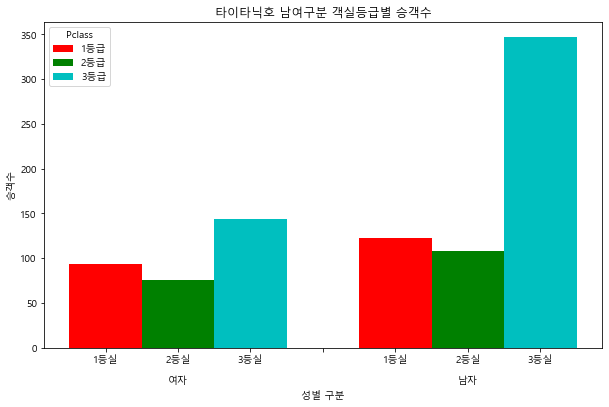

In [56]:
t1 = [1,5]
t2 = [2,6]
t3 = [3,7]

plt.figure(figsize = (10, 6))
plt.bar(t1, count_p1, color = 'r', width = 1, label = '1등급')
plt.bar(t2, count_p2, color = 'g', width = 1, label = '2등급')
plt.bar(t3, count_p3, color = 'c', width = 1, label = '3등급')
plt.title('타이타닉호 남여구분 객실등급별 승객수')
plt.xlabel('성별 구분')
plt.ylabel('승객수')
plt.legend(title = 'Pclass')

t = list(range(1,8))
# set the locations of the xticks
# plt.xticks(t , ('','여자','','','','남자',''))   
plt.xticks(t , ('1등실','2등실\n\n여자','3등실','','1등실','2등실\n\n남자','3등실'))   
plt.show()

In [57]:
count_all = [0]
count_all.extend(count_f)
count_all.append(0)
count_all.extend(count_m)
count_all


[0, 94, 76, 144, 0, 122, 108, 347]

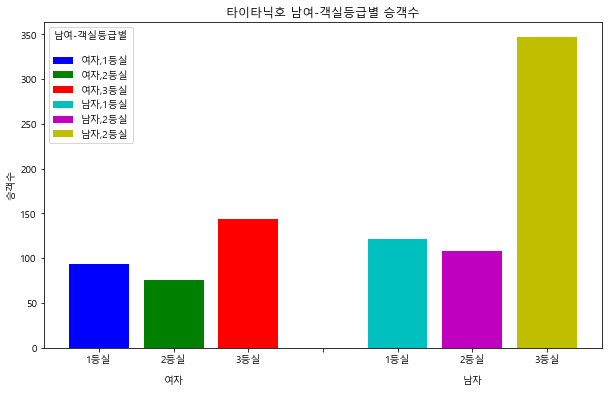

In [59]:
plt.figure(figsize=(10,6))

colors = ['w' , 'b', 'g', 'r', 'w', 'c', 'm', 'y', 'w', 'k' ]
labels = ['', '여자,1등실', '여자,2등실', '여자,3등실', '', '남자,1등실', '남자,2등실', '남자,2등실']
# xticks = ('', '여자','','','','남자','' )
xticks = ('1등실', '2등실\n\n여자','3등실','','1등실','2등실\n\n남자','3등실' )
t = list(range(1,8))

for idx in range(1, 8):
    plt.bar(idx, count_all[idx], color=colors[idx], width=0.8, label=labels[idx])

plt.title('타이타닉호 남여-객실등급별 승객수')
plt.ylabel('승객수')
plt.legend(title='남여-객실등급별\n')

plt.xticks(t , xticks)   # set the locations of the xticks
plt.show()